In [43]:
# importing neccessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns

In [71]:
# visualizing the data 

df= pd.read_csv("Heart_attack.csv")
df.replace('?',np.nan, inplace=True)
df.isna().sum()


age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [79]:
# lists_na=['slope','ca','thal']
# df.drop(columns=lists_na, inplace=True)
df.dropna(inplace=True)
print(df.isna().sum())
df= df.apply(pd.to_numeric)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
labels      0
dtype: int64


In [82]:
scaler= StandardScaler()
min_max= MinMaxScaler()
scale_cols=['trestbps','chol','thalach']
for i in scale_cols:
    df[i]= scaler.fit_transform(df[[i]])

df.rename(columns={df.columns[-1]:'labels'}, inplace=True)
df['age']= min_max.fit_transform(df[['age']])

for i in df.columns[:-1]:
    print(i, df[i].mean(), df[i].std())



age 0.5343274308791551 0.21195254881249737
sex 0.735632183908046 0.4418432574918186
cp 3.003831417624521 0.9707177530498036
trestbps 2.7223859607666672e-17 1.0019212313581112
chol 0.0 1.0019212313581112
fbs 0.07279693486590039 0.2603020304713198
restecg 0.2260536398467433 0.47093538364964577
thalach 0.0 1.0019212313581114
exang 0.31800766283524906 0.4665971907358568
oldpeak 0.6122605363984674 0.9319144197327697


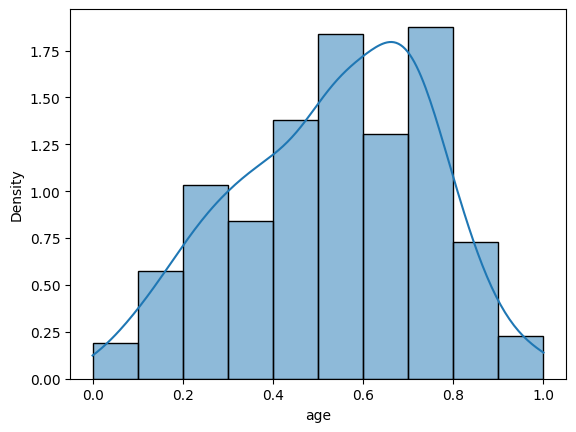

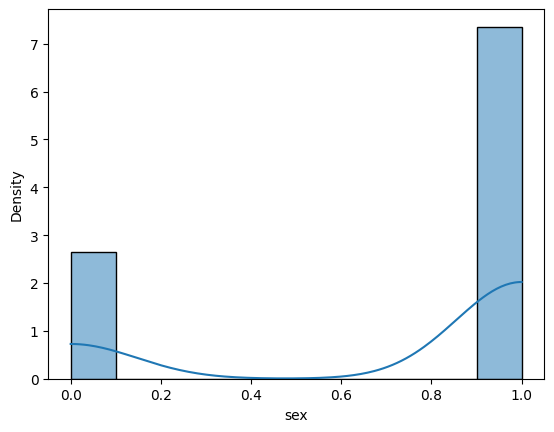

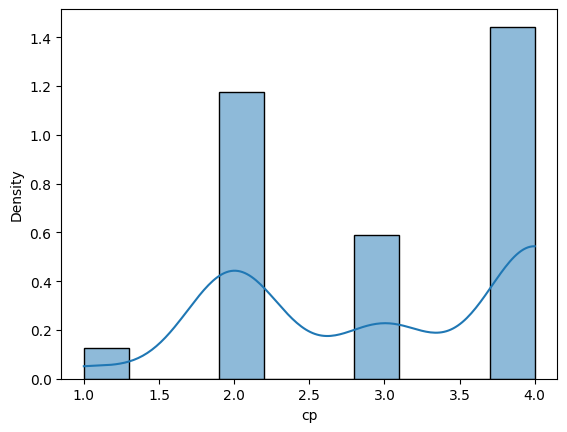

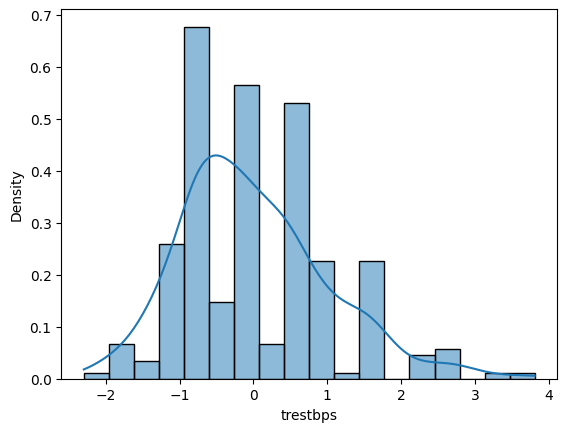

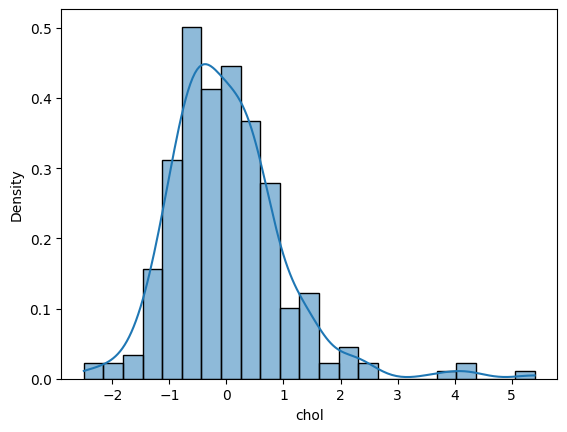

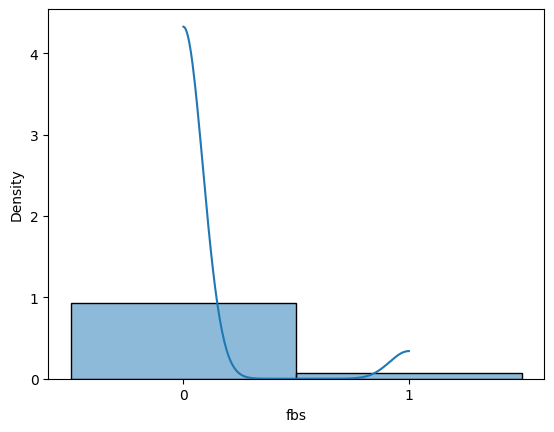

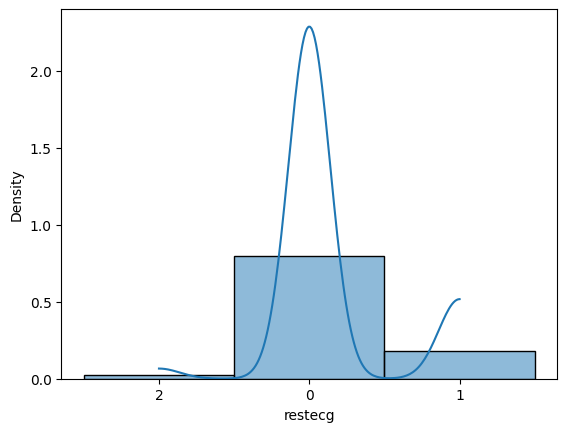

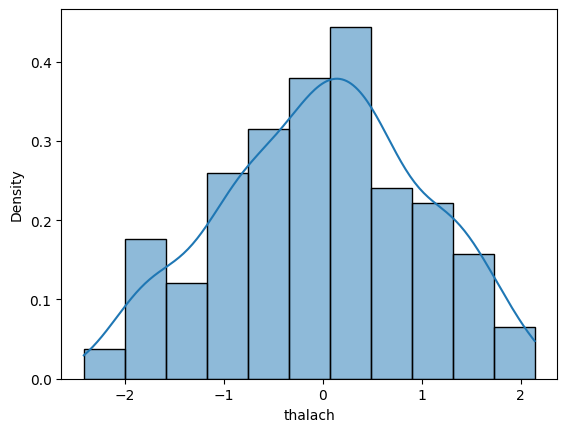

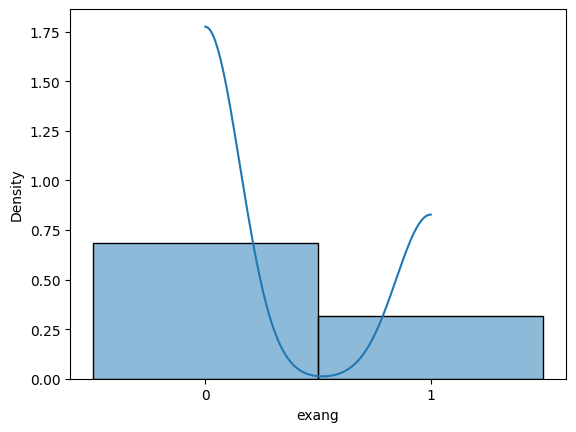

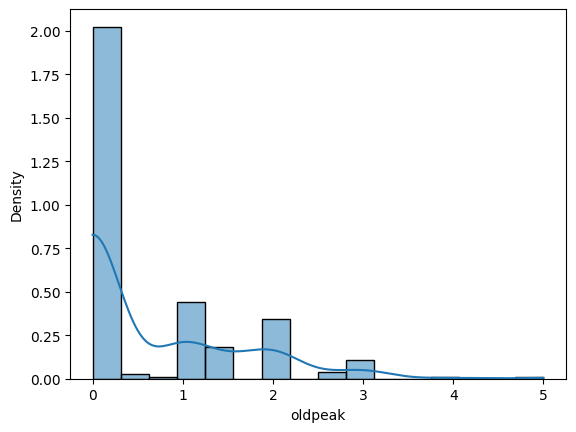

In [51]:
X_arr, Y_arr= df.drop(columns='labels'), df['labels']
for i in X_arr.columns:
    sns.histplot(x= X_arr[i],data= X_arr,stat='density', kde='True')
    plt.show()

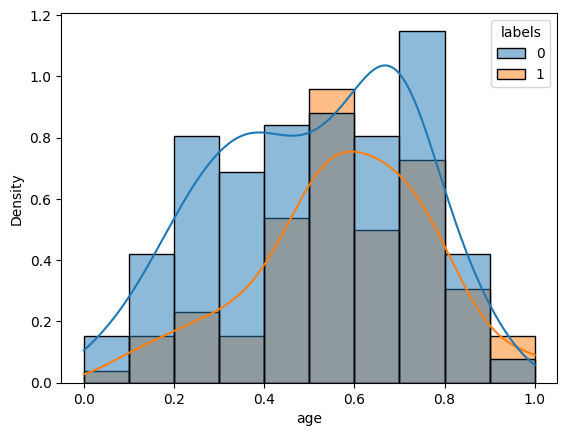

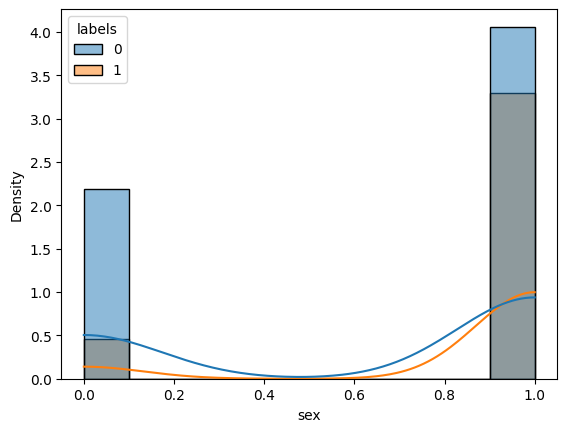

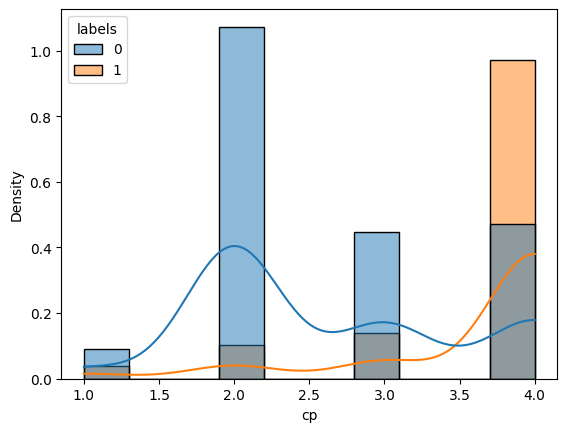

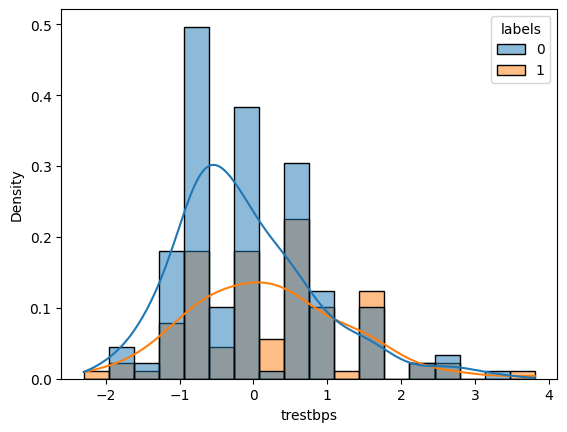

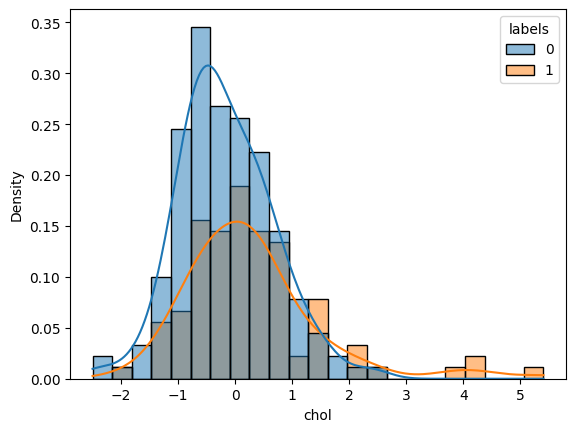

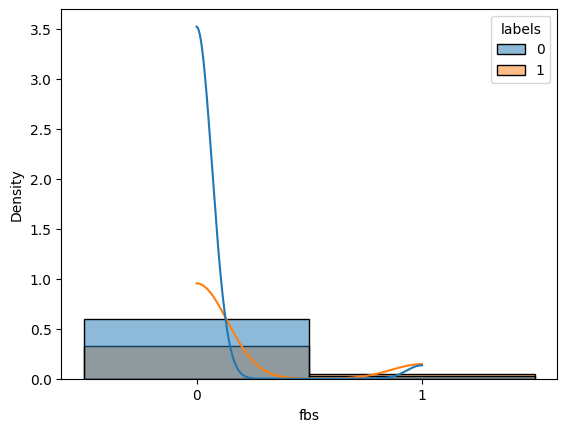

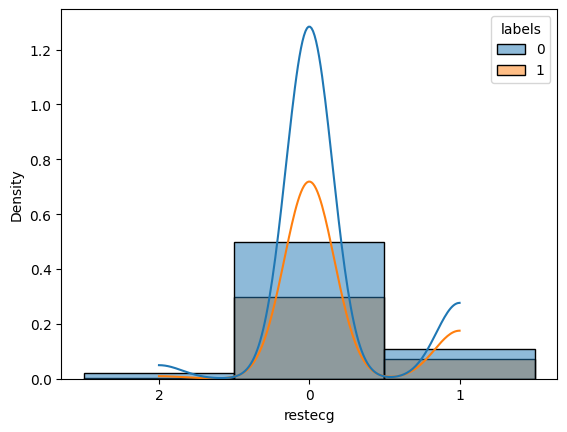

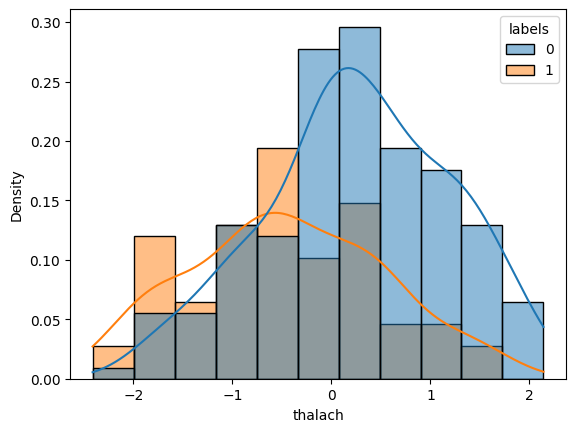

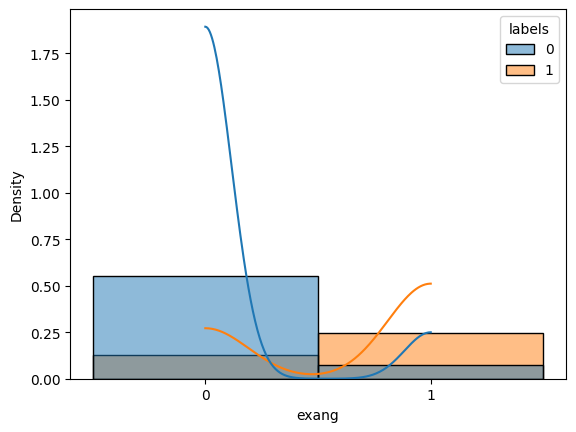

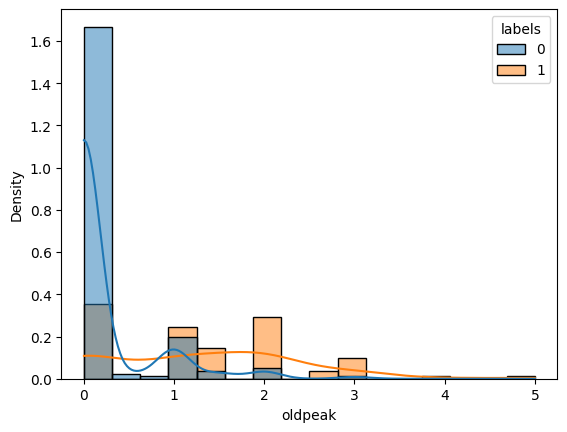

In [52]:
X_arr, Y_arr= df.drop(columns='labels'), df['labels']
for i in X_arr.columns:
    sns.histplot(x= X_arr[i],data= X_arr, hue=Y_arr, stat= 'density', kde='True')
    plt.show()

In [54]:
Y_arr.value_counts()

labels
0    163
1     98
Name: count, dtype: int64

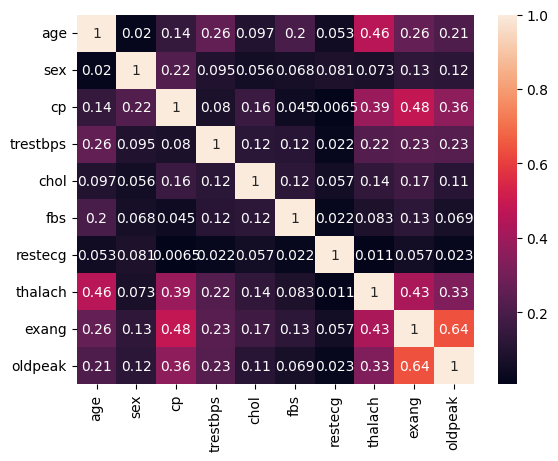

In [55]:
sns.heatmap(X_arr.corr().abs(), annot=True)
df.drop(columns='oldpeak', inplace=True)


In [ ]:
df.to_csv("Processed_data.csv", index=False)

In [57]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,labels
0,0.000000,1,2,-0.149347,-1.782424,0,2,1.930425,0,0
1,0.027027,1,2,-0.715089,-0.088855,0,0,0.876100,0,0
3,0.054054,0,1,2.113621,-0.180399,0,1,1.297830,0,0
4,0.081081,0,2,-1.846574,-0.455032,0,1,0.454370,0,0
5,0.108108,0,2,-1.563703,-0.775437,0,0,1.086965,0,0
...,...,...,...,...,...,...,...,...,...,...
289,0.648649,1,4,1.547879,1.253794,0,0,-1.907319,1,1
290,0.702703,0,3,-0.149347,0.689271,0,1,-1.654281,1,1
291,0.756757,1,4,1.265008,1.421625,1,0,0.454370,1,1
292,0.810811,0,2,2.679363,2.199751,0,0,-1.232551,1,1
